# Primeiros passos usando AWS

## Os objetivos do estudo para esse momento são:

* Criar um bucket S3
* Fazer upload de um arquivo para um bucket
* Fazer download de um arquivo para um bucket
* Mover arquivos entre buckets
* Deletar arquivo de um bucket
* Deletar um bucket
* Listar objetos de um bucket
* Verificar se um objeto existe em um bucket ou não

In [1]:
import boto3
from botocore.exceptions import ClientError

Resource é uma interface de mais alto nível comparada ao client. Ele oferece uma interação mais intuitiva e orientada a objetos com os serviços da AWS.

Ao invés de chamar métodos de API diretamente, é possível trabalhar com objetos e métodos que representam entidades da AWS de uma forma mais Pythonica. Por exemplo, você pode tratar cada bucket como um objeto e realizar operações diretamente nele.

In [2]:
s3 = boto3.resource('s3')

### 1 Criando um bucket no S3

In [5]:
bucket_name = '202311testeaws'

In [6]:
try:
    # O nome do bucket precisa ser único em toda a AWS
    new_bucket = s3.create_bucket(Bucket=bucket_name)

    # Aguardar até que o bucket exista
    new_bucket.wait_until_exists()
    
    print(f"Bucket {bucket_name} criado com sucesso.")
except ClientError as e:
    print(f"Erro ao criar o bucket: {e}")

Bucket 202311testeaws criado com sucesso.


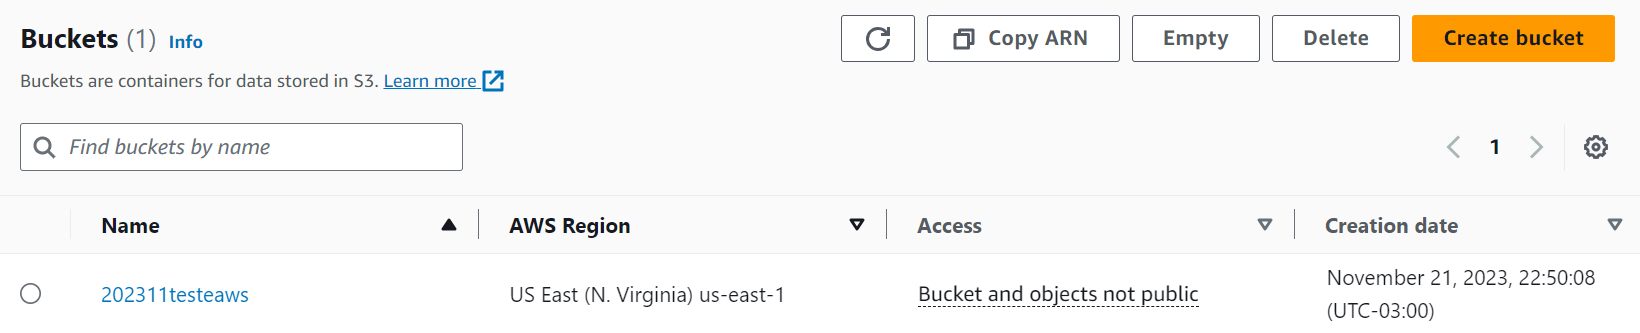

Bucket criado com sucesso!

### 2 Fazer upload de um arquivo para um bucket

Vou fazer download de um dataset do Kaggle via API. Para isto, é possível fazer operações utilizando o comandos para visualizar os dataset existentes e fazer o download

Kaggle datasets list

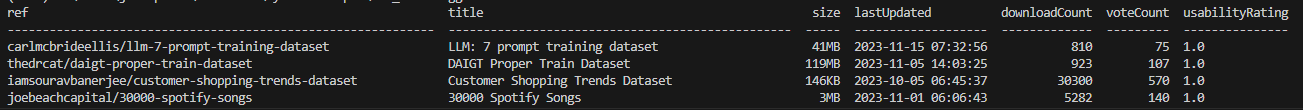

Eu vou selecionar o dataset de Saúde Mental na Indústria de Tecnologia

O comando a ser executado pela API é: kaggle datasets download -d anth7310/mental-health-in-the-tech-industry --unzip

O arquivo agora está no diretório local

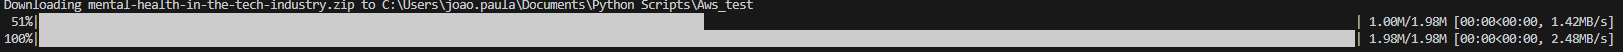


In [7]:
nome_do_arquivo_local = 'mental_health.sqlite'
nome_do_arquivo_no_s3 = 'mental_health.sqlite'
nome_do_bucket = bucket_name

In [8]:
# Criar um recurso S3
s3 = boto3.resource('s3')

try:
    # Fazer o upload do arquivo
    s3.Bucket(nome_do_bucket).upload_file(nome_do_arquivo_local, nome_do_arquivo_no_s3)
    print(f"Arquivo {nome_do_arquivo_local} enviado com sucesso para o bucket {nome_do_bucket} como {nome_do_arquivo_no_s3}.")
except ClientError as e:
    print(f"Erro ao enviar o arquivo: {e}")

Arquivo mental_health.sqlite enviado com sucesso para o bucket 202311testeaws como mental_health.sqlite.


Feito! Arquivo foi transferido para o bucket 202311testeaws com sucesso
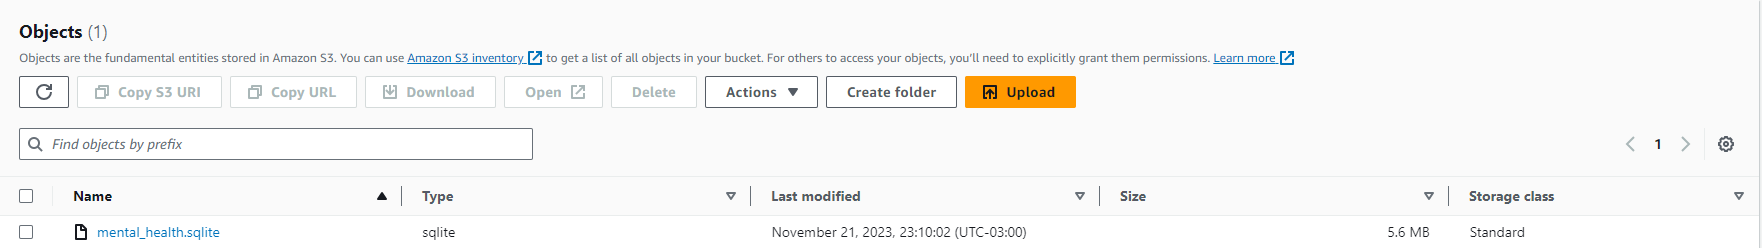

### 3 Fazer download de um arquivo para um bucket

In [14]:
for bucket in s3.buckets.all():
    print(bucket.name)

202311testeaws


In [16]:
for objeto in s3.Bucket(bucket_name).objects.all():
    print(objeto.key)

mental_health.sqlite


Pronto, agora relembrei o nome dos buckets e dos objetos existentes. Agora vou fazer download do arquivo mental_health.sqlite.

Para testar, eu apaguei o arquivo do meu diretório local


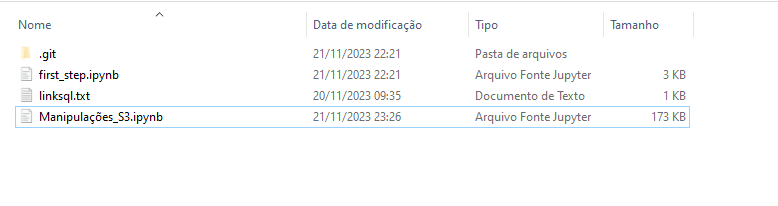

In [18]:
nome_bucket = '202311testeaws'
nome_do_arquivo_local = 'mental_health.sqlite'
nome_do_arquivo_no_s3 = 'mental_health.sqlite'

In [19]:
try:
    # Fazer o download do arquivo
    s3.Bucket(nome_do_bucket).download_file(nome_do_arquivo_no_s3, nome_do_arquivo_local)
    print(f"Arquivo {nome_do_arquivo_no_s3} baixado com sucesso para {nome_do_arquivo_local}.")
except ClientError as e:
    print(f"Erro ao baixar o arquivo: {e}")

Arquivo mental_health.sqlite baixado com sucesso para mental_health.sqlite.


Sucesso! O arquivo foi baixado corretamente

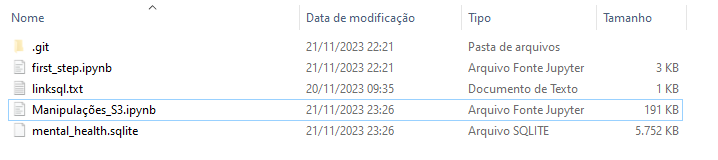

### 4 Mover arquivos entre buckets

Para fazer isso, vou criar um novo bucket, chamado: 202311testeaws2

In [20]:
novo_bucket = '202311testeaws2'

In [21]:
s3 = boto3.resource('s3')

In [22]:
try:
    # O nome do bucket precisa ser único em toda a AWS
    new_bucket = s3.create_bucket(Bucket=novo_bucket)

    # Aguardar até que o bucket exista
    new_bucket.wait_until_exists()
    
    print(f"Bucket {novo_bucket} criado com sucesso.")
except ClientError as e:
    print(f"Erro ao criar o bucket: {e}")

Bucket 202311testeaws2 criado com sucesso.


Dois buckets criados, quero passar o arquivo mental_health.sqlite para o novo bucket

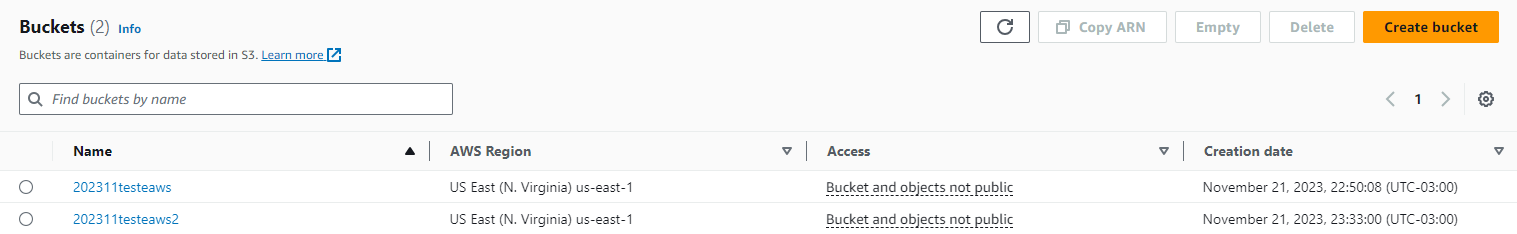

Não tem como mover um arquivo, mas sim copiar e depois deletar do bucket de origem, fazendo a mesma função de mover.

Aqui, vou operar apenas a cópia e na sequência deletar o novo arquivo do bucket de teste

In [23]:
for bucket in s3.buckets.all():
    print(bucket.name)

202311testeaws
202311testeaws2


In [28]:
for obj in s3.Bucket('202311testeaws').objects.all():
    print(obj.key)

mental_health.sqlite


In [29]:
bucket_origem = '202311testeaws'
bucket_destino = '202311testeaws2'
nome_do_arquivo = 'mental_health.sqlite'

In [30]:
try:
    # Copiar o arquivo para o bucket de destino
    copia_fonte = {
        'Bucket': bucket_origem,
        'Key': nome_do_arquivo
    }
    s3.meta.client.copy(copia_fonte, bucket_destino, nome_do_arquivo)
    
    print(f"Arquivo {nome_do_arquivo} movido com sucesso de {bucket_origem} para {bucket_destino}.")
    
except ClientError as e:
    print(f"Erro ao mover o arquivo: {e}")


Arquivo mental_health.sqlite movido com sucesso de 202311testeaws para 202311testeaws2.


Arquivo copiado para o novo bucket

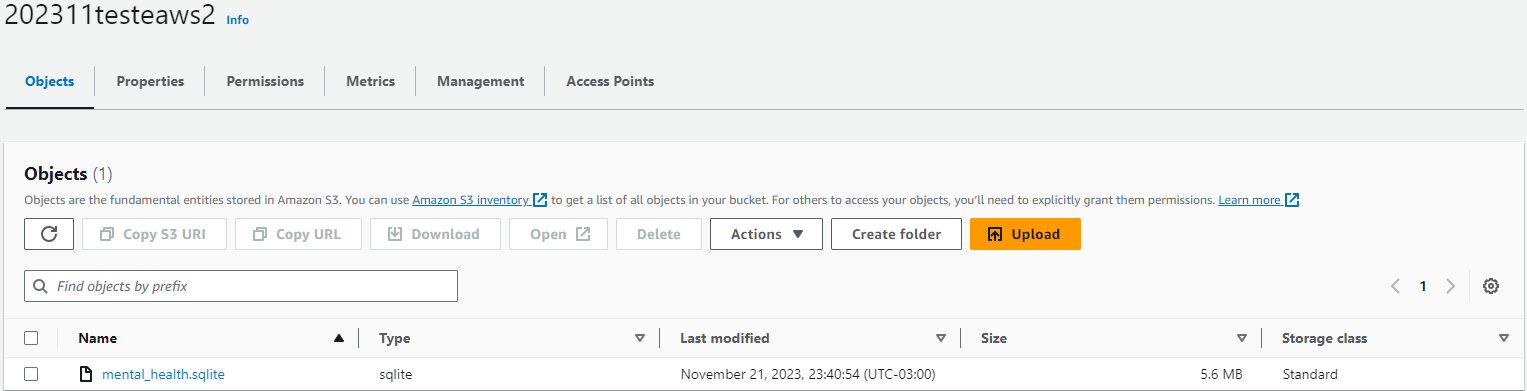

### 5 Remover um arquivo de um bucket

In [31]:
nome_bucket = '202311testeaws2'
nome_arquivo = 'mental_health.sqlite'

In [32]:
# Excluir o arquivo original no bucket de origem
try:
    s3.Object(nome_bucket, nome_arquivo).delete()

    print(f"Arquivo {nome_do_arquivo} removido com sucesso de {nome_bucket}")
except ClientError as e:
    print(f"Erro ao mover o arquivo: {e}")

Arquivo mental_health.sqlite removido com sucesso de 202311testeaws2


Arquivo removido com sucesso!

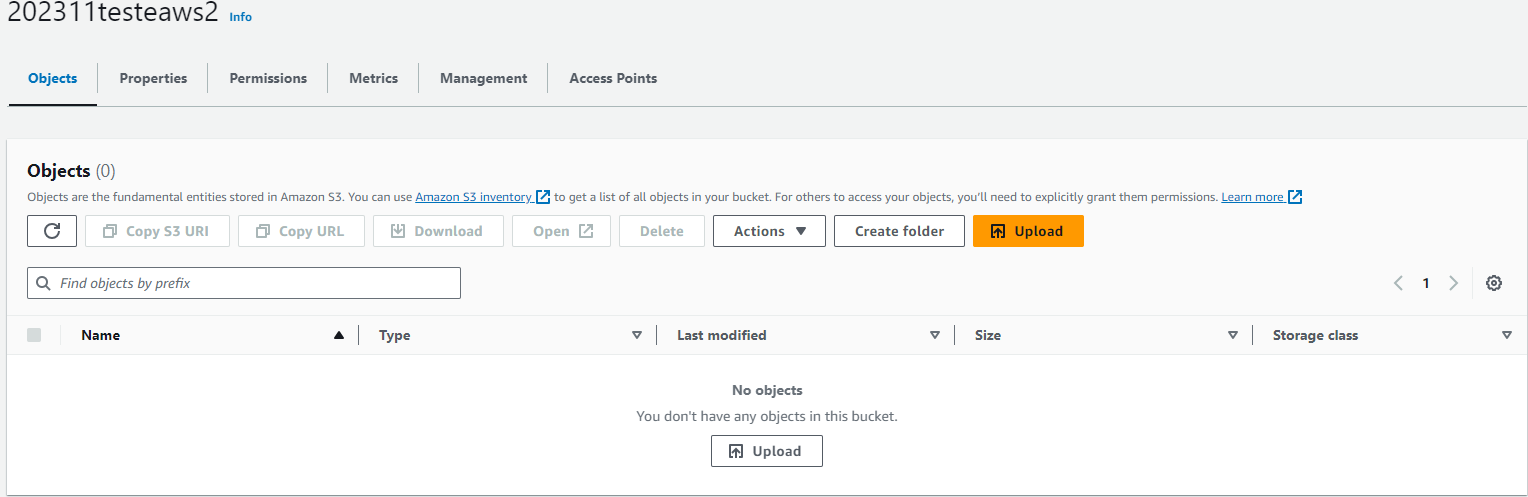

In [28]:
# for bucket in s3client.list_buckets()['Buckets']:
#     bucket_name = bucket['Name']
#     print(f'Acesso ao bucket: {bucket_name}')
#     bucket = s3.Bucket(bucket_name)
#     for obj in bucket.objects.all():
#         key = obj.key
#         print(f'Encontrou-se o objeto: {key}')
#         body = obj.get()['Body'].read()
    

Acesso ao bucket: 20231119mentalhealthbase
Encontrou-se o objeto: mental_health_database.sqlite


In [31]:
for bucket in s3.buckets.all():
    print(bucket.name)
    for obj in bucket.objects.all():
        print(obj.key)
        body = obj.get()['Body'].read()

20231119mentalhealthbase
mental_health_database.sqlite


In [3]:
response = s3client.get_object(Bucket='your-bucket-name', Key='your-object-key')

ClientError: An error occurred (AllAccessDisabled) when calling the GetObject operation: All access to this object has been disabled